# Experiments on MDVR-KCL Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [4]:
df = pd.read_csv("./readtext.csv")
#df = shuffle(df)
#df.reset_index(inplace=True, drop=True)
df.drop('voiceID', inplace = True, axis = 1)
df['label'].value_counts()
df

,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,label
0,180.433976,51.653057,13.292053,0.027039,0.000151,0.012019,0.013197,0.113439,1.124025,0.046161,0.067371,0
1,190.751972,34.887596,11.243993,0.016118,0.000085,0.006764,0.007168,0.079053,0.740666,0.029396,0.038308,0
2,124.477366,26.621493,13.423983,0.026740,0.000216,0.010862,0.011512,0.102565,0.974095,0.039042,0.058131,0
3,182.557207,39.933612,12.235210,0.020701,0.000114,0.008979,0.008983,0.080388,0.811653,0.025759,0.037847,0
4,195.969796,41.446983,14.669165,0.015063,0.000077,0.005371,0.006017,0.082016,0.827343,0.029087,0.043951,0
5,168.012461,35.493510,13.020618,0.021790,0.000130,0.009273,0.009862,0.078274,0.786047,0.024992,0.039414,0
6,203.130952,48.609299,12.333993,0.027164,0.000134,0.012624,0.013001,0.102844,0.994058,0.039932,0.053414,0
7,197.503773,36.631657,15.683277,0.017656,0.000090,0.007171,0.007674,0.078181,0.757354,0.029970,0.039306,0
8,199.081279,41.081947,11.784297,0.024917,0.000125,0.011396,0.011915,0.096619,0.963974,0.033895,0.049371,0
9,157.113264,46.419171,13.388906,0.034113,0.000217,0.017499,0.016585,0.119624,1.104118,0.053728,0.058976,0


In [50]:
#separate dependent and independent variable
X = df.iloc[:, :-1]
df_X = df.iloc[:, :-1].values
df_Y = df.iloc[:,-1].values

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.3, random_state = 0)

pd.DataFrame(X_train)


,0,1,2,3,4,5,6,7,8,9,10
0,185.303514,52.677109,14.082311,0.021292,0.000115,0.010419,0.009892,0.089151,0.877028,0.033184,0.042282
1,166.779713,30.941409,11.148522,0.025417,0.000153,0.013308,0.012758,0.107019,1.000508,0.049595,0.057682
2,131.225704,23.870219,14.041177,0.024799,0.000189,0.008344,0.010311,0.104867,1.005431,0.036322,0.055991
3,213.746231,45.818006,14.262968,0.020147,0.000094,0.008710,0.009108,0.071151,0.752922,0.023605,0.034078
4,199.081279,41.081947,11.784297,0.024917,0.000125,0.011396,0.011915,0.096619,0.963974,0.033895,0.049371
5,173.417455,34.365179,14.193625,0.022659,0.000131,0.009854,0.010656,0.090751,0.878991,0.031667,0.046121
6,168.012461,35.493510,13.020618,0.021790,0.000130,0.009273,0.009862,0.078274,0.786047,0.024992,0.039414
7,194.704118,54.785527,13.076819,0.021499,0.000111,0.009724,0.009703,0.086963,0.876711,0.032313,0.044567
8,179.048747,35.403221,16.224981,0.013899,0.000078,0.005279,0.005674,0.072685,0.730909,0.027094,0.038795
9,197.503773,36.631657,15.683277,0.017656,0.000090,0.007171,0.007674,0.078181,0.757354,0.029970,0.039306


### Feature scaling

In [13]:
# Scale
#sc = StandardScaler()
sc = MinMaxScaler()
#sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.683159,0.934727,0.514127,0.365714,0.252388,0.420615,0.386582,0.466749,0.463082,0.318015,0.281224
1,0.480170,0.261822,0.000000,0.569791,0.502888,0.657009,0.649233,0.761632,0.693850,0.862800,0.605668
2,0.090560,0.042909,0.506918,0.539225,0.746808,0.250842,0.425005,0.726118,0.703052,0.422196,0.570045
3,0.994842,0.722379,0.545786,0.309113,0.114155,0.280805,0.314770,0.169704,0.231142,0.000000,0.108383
4,0.834140,0.575758,0.111415,0.545052,0.320417,0.500617,0.571964,0.589996,0.625574,0.341612,0.430574
5,0.552909,0.367817,0.533634,0.433380,0.359524,0.374398,0.456565,0.493161,0.466750,0.267652,0.362105
6,0.493679,0.402748,0.328072,0.390382,0.350274,0.326849,0.383806,0.287253,0.293049,0.046075,0.220798
7,0.786174,1.000000,0.337921,0.375990,0.222888,0.363734,0.369304,0.430656,0.462488,0.289103,0.329359
8,0.614618,0.399953,0.889615,0.000000,0.004697,0.000000,0.000000,0.195013,0.190002,0.115829,0.207765
9,0.816853,0.437984,0.794685,0.185842,0.083057,0.154837,0.183334,0.285719,0.239425,0.211324,0.218521


# *****************KNN Experiments******************

## Build model
### without tuning the hyperparameters

In [36]:
###### KNNN ###########
# Fit classifier to the Training set
#KNN
model_knn = KNeighborsClassifier(n_neighbors = 10)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn = ((conf_matrix_knn[0,0] + conf_matrix_knn[1,1])/(conf_matrix_knn[0,0] +conf_matrix_knn[0,1]+conf_matrix_knn[1,0]+conf_matrix_knn[1,1]))*100


print(accuracy_knn)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_knn)

print(conf_matrix_knn)

66.66666666666666
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

0.6666666666666667
[1 1 0 0 0 1 0 0 1 0 1 1]
[[4 2]
 [2 4]]


## Hyperparameter tuning for KNN

In [38]:
########Hyperparameter tuning for KNN####################
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,20)) #neighbours must be < number of samples (22)
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

print(conf_matrix_knn_2)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 9
Best Score: 0.76
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 9, 'p': 1}
{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'p': [1, 2]}
83.33333333333334
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.75      1.00      0.86         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12

0.8333333333333334
[1 1 0 0 1 1 0 0 1 1 1 1]
[1 0 0 0 1 1 0 0 0 1 1 1]
[[4 2]
 [0 6]]


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Build Model
### using the optimal parameters gotten above

In [223]:
model_knn = KNeighborsClassifier(n_neighbors = 9, p = 1, leaf_size = 1)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn = ((conf_matrix_knn[0,0] + conf_matrix_knn[1,1])/(conf_matrix_knn[0,0] +conf_matrix_knn[0,1]+conf_matrix_knn[1,0]+conf_matrix_knn[1,1]))*100


print(accuracy_knn)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_knn)
print(y_test)
print(conf_matrix_knn)

83.33333333333334
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.75      1.00      0.86         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12

0.8333333333333334
[1 1 0 0 1 1 0 0 1 1 1 1]
[1 0 0 0 1 1 0 0 0 1 1 1]
[[4 2]
 [0 6]]


## Evaluation 


### Evaluation with Leave one out method

In [64]:
df_X = sc.fit_transform(df_X)
k_fold = KFold(n_splits=37)
#KNN
model_knn_kfold = KNeighborsClassifier(n_neighbors = 9, p =1, leaf_size = 1)
y_pred_kfold_knn = cross_val_predict(model_knn_kfold, df_X, df_Y, cv=k_fold)

scores = cross_val_score(model_knn_kfold, df_X, df_Y, scoring='accuracy', cv=k_fold, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

print(df_Y)
print(y_pred_kfold_knn)
conf_matrix_knn_kfold = confusion_matrix(df_Y, y_pred_kfold_knn)
print("Confusion Matrix for KNN using k-fold (leave one out)")
print(conf_matrix_knn_kfold)


accuracy_knn_2 = ((conf_matrix_knn_kfold[0,0] + conf_matrix_knn_kfold[1,1])/(conf_matrix_knn_kfold[0,0] +conf_matrix_knn_kfold[0,1]+conf_matrix_knn_kfold[1,0]+conf_matrix_knn_kfold[1,1]))*100


print(accuracy_knn_2)

Accuracy: 0.649 (0.477)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0]
Confusion Matrix for KNN using k-fold (leave one out)
[[18  3]
 [10  6]]
64.86486486486487


### K Fold Evaluation using optimal paramaters. (k =3)


In [63]:
#df_kfold = shuffle(df)
#df_kfold.reset_index(inplace=True, drop=True)
from sklearn.model_selection import StratifiedKFold
df_kfold = df
df_Xnew = df_kfold.iloc[:, :-1].values
df_Ynew = df_kfold.iloc[:,-1].values


X_kfold = pd.DataFrame(df_Xnew)
y_kfold = pd.DataFrame(df_Ynew)
#print(X_kfold)
#print(y_kfold)

parts = 4
kfold = KFold(parts, True, None) 

# splits into 5 groups 
print("Divided into %s parts." %parts)

k_list = []

for i in range (1,12):
    row = []
    row.append(i)
    total = 0
    #print("Loop", i)
    for train, test in kfold.split(X_kfold,y_kfold):
        #print('\ntrain: %s, test: %s' % (train, test))
        Xtrain_kfold = X_kfold.iloc[train, :]
        Ytrain_kfold = y_kfold.iloc[train, :]
        Xtest_kfold = X_kfold.iloc[test, :]
        Ytest_kfold = y_kfold.iloc[test, :]
        #print(Xtest_kfold)
        #print(Ytest_kfold)

        Xtrain_kfold = sc.fit_transform(Xtrain_kfold)
        Xtest_kfold = sc.transform(Xtest_kfold)

        #modelling
        model_knn_new = KNeighborsClassifier(n_neighbors = 9, p =1, leaf_size = 1)
        model_knn_new.fit(Xtrain_kfold, Ytrain_kfold)
        y_pred_knn_new = model_knn_new.predict(Xtest_kfold)

        conf_matrix_knn_kfold = confusion_matrix(Ytest_kfold, y_pred_knn_new)

        accuracy_knn_kfold = ((conf_matrix_knn_kfold[0,0] + conf_matrix_knn_kfold[1,1])/(conf_matrix_knn_kfold[0,0] +conf_matrix_knn_kfold[0,1]+conf_matrix_knn_kfold[1,0]+conf_matrix_knn_kfold[1,1]))*100

        #print("Confusion Matrix:\n ", conf_matrix_knn_kfold)
        #print("Accuracy ", accuracy_knn_kfold)

        row.append(accuracy_knn_kfold)
        total += accuracy_knn_kfold
    average = row.append(total/parts)
        
    #print(row)
    k_list.append(row)
    
k_list = pd.DataFrame(k_list, columns=['Loops','fold 1','fold 2','fold 3','fold 4', 'mean accuracy'])
k_list
    

    
    
    
#print(df.sample(n=7))
#print(df)

#x = df.take(np.random.permutation(len(df))[:4])
#x= df.sample(n=7)
#print(x)
#print(df.drop(x))

#drop_indices = np.random.choice(df.index, 4, replace=False)
#df_subset = df.drop(drop_indices)
#print(drop_indices)
#print(df_subset)

    
    


Divided into 4 parts.


C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Aeesha\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DataConversionWarning: A c

,Loops,fold 1,fold 2,fold 3,fold 4,mean accuracy
0,1,70.0,55.555556,44.444444,77.777778,61.944444
1,2,60.0,66.666667,33.333333,88.888889,62.222222
2,3,70.0,55.555556,55.555556,55.555556,59.166667
3,4,70.0,55.555556,44.444444,77.777778,61.944444
4,5,50.0,77.777778,88.888889,55.555556,68.055556
5,6,60.0,55.555556,66.666667,77.777778,65.000000
6,7,60.0,22.222222,66.666667,55.555556,51.111111
7,8,60.0,77.777778,55.555556,55.555556,62.222222
8,9,60.0,55.555556,77.777778,66.666667,65.000000
9,10,50.0,55.555556,33.333333,55.555556,48.611111



# *****************Decision Tree Experiments***************

## Build model
### without tuning the hyperparameters

66.66666666666666
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

0.6666666666666667
[1 1 0 0 1 0 0 0 1 1 1 0]
[[4 2]
 [2 4]]


[Text(334.8, 684.9359999999999, 'X[1] <= 0.277\ngini = 0.48\nsamples = 25\nvalue = [15, 10]'),
 Text(167.4, 532.728, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(502.20000000000005, 532.728, 'X[6] <= 0.254\ngini = 0.408\nsamples = 21\nvalue = [15, 6]'),
 Text(334.8, 380.52, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(669.6, 380.52, 'X[2] <= 0.437\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(334.8, 228.312, 'X[8] <= 0.962\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(167.4, 76.10399999999993, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(502.20000000000005, 76.10399999999993, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(1004.4000000000001, 228.312, 'X[0] <= 0.668\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(837.0, 76.10399999999993, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(1171.8, 76.10399999999993, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

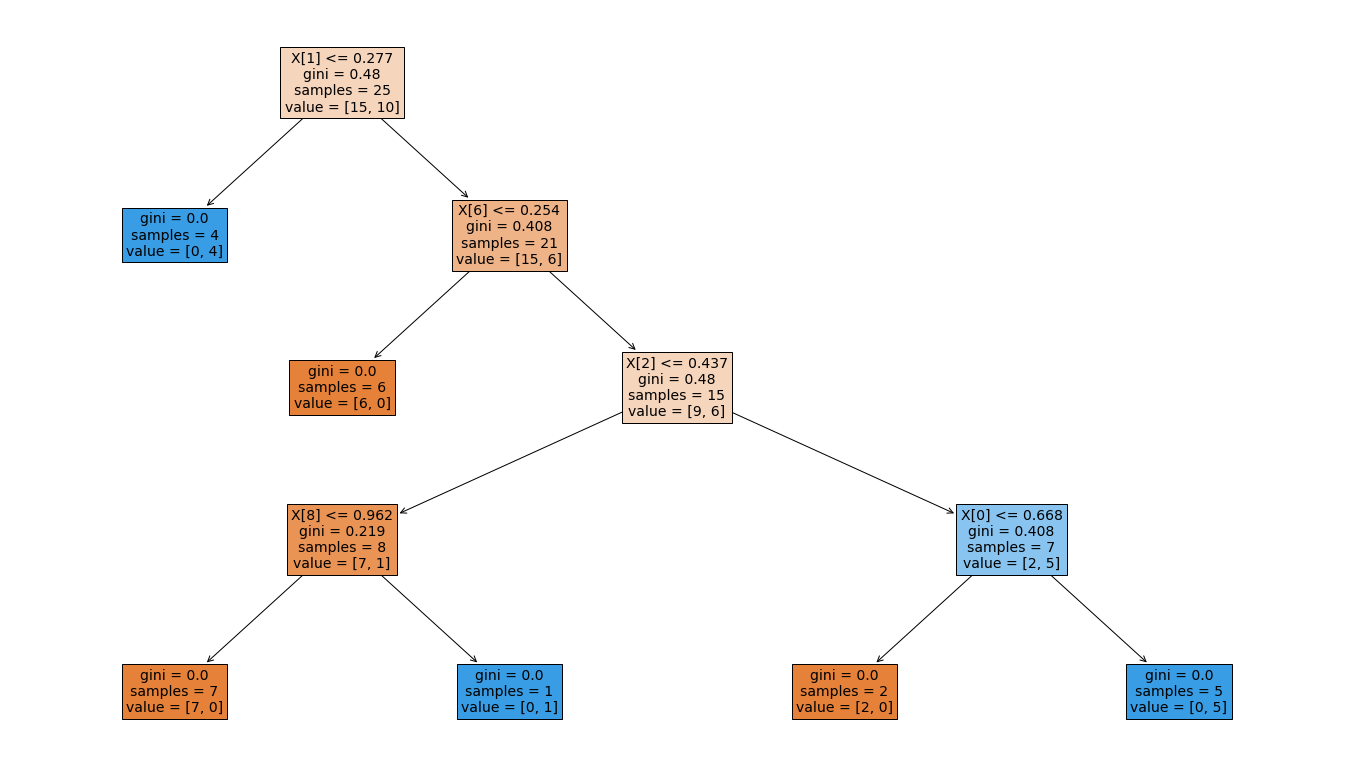

In [15]:
###### KNNN ###########
# Fit classifier to the Training set
#Decision Tree
import matplotlib.pyplot as plt
model_dt = tree.DecisionTreeClassifier()
model_dt = model_dt.fit(X_train, y_train)

y_pred_knn = model_dt.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn = ((conf_matrix_knn[0,0] + conf_matrix_knn[1,1])/(conf_matrix_knn[0,0] +conf_matrix_knn[0,1]+conf_matrix_knn[1,0]+conf_matrix_knn[1,1]))*100


print(accuracy_knn)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_knn)

print(conf_matrix_knn)

plt.figure(figsize=(24,14))
tree.plot_tree(model_dt, filled=True, fontsize=14)

## Hyperparameter tuning for Decision Trees

In [31]:
########Hyperparameter tuning for KNN####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
max_depth = list(range(1,10))
min_samples_split = list(range(2,10)) #neighbours must be < number of samples (22)
min_samples_leaf = list(range(1,5))
criterion=['gini','entropy']
#Convert to dictionary
hyperparameters = dict(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, criterion = criterion)
#Create new KNN object
dt_2 = tree.DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(dt_2, hyperparameters, refit=True)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

print(conf_matrix_knn_2)

C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Score: 0.6
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4], 'criterion': ['gini', 'entropy']}
75.0
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.71      0.83      0.77         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12

0.7500000000000002
[1 1 0 0 1 1 0 0 1 0 1 1]
[1 0 0 0 1 1 0 0 0 1 1 1]
[[4 2]
 [1 5]]


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Build Model (Decision Tree)
### using the optimal parameters gotten above

In [32]:
#model_dt = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
model_dt = tree.DecisionTreeClassifier(max_depth = 1, criterion='gini',min_samples_leaf=1, min_samples_split=2 )
model_dt = model_dt.fit(X_train, y_train)

y_pred_dt_2 = best_model.predict(X_test)

conf_matrix_dt_2 = confusion_matrix(y_test, y_pred_dt_2)

accuracy_dt_2 = ((conf_matrix_dt_2[0,0] + conf_matrix_dt_2[1,1])/(conf_matrix_dt_2[0,0] +conf_matrix_dt_2[0,1]+conf_matrix_dt_2[1,0]+conf_matrix_dt_2[1,1]))*100

print(conf_matrix_dt_2)
print(accuracy_dt_2)

[[4 2]
 [1 5]]
75.0


## Evaluation 


### Evaluation with Leave one out method

In [55]:
df_X = sc.fit_transform(df_X)
k_fold = KFold(n_splits=37)
#KNN
#model_knn_kfold = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
model_dt = tree.DecisionTreeClassifier(max_depth = 1, criterion='gini',min_samples_leaf=1, min_samples_split=2 )
y_pred_kfold_knn = cross_val_predict(model_dt, df_X, df_Y, cv=k_fold)
scores = cross_val_score(model_dt, df_X, df_Y, scoring='accuracy', cv=k_fold, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

print(df_Y)
print(y_pred_kfold_knn)
conf_matrix_knn_kfold = confusion_matrix(df_Y, y_pred_kfold_knn)
print("Confusion Matrix for Dt using k-fold (leave one out)")
print(conf_matrix_knn_kfold)


accuracy_knn_2 = ((conf_matrix_knn_kfold[0,0] + conf_matrix_knn_kfold[1,1])/(conf_matrix_knn_kfold[0,0] +conf_matrix_knn_kfold[0,1]+conf_matrix_knn_kfold[1,0]+conf_matrix_knn_kfold[1,1]))*100


print(accuracy_knn_2)

Accuracy: 0.568 (0.495)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
Confusion Matrix for Dt using k-fold (leave one out)
[[17  4]
 [11  5]]
59.45945945945946


### K Fold Evaluation using optimal paramaters. (k =4)


In [61]:
#df_kfold = shuffle(df)
#df_kfold.reset_index(inplace=True, drop=True)
from sklearn.model_selection import StratifiedKFold
df_kfold = df
df_Xnew = df_kfold.iloc[:, :-1].values
df_Ynew = df_kfold.iloc[:,-1].values


X_kfold = pd.DataFrame(df_Xnew)
y_kfold = pd.DataFrame(df_Ynew)
#print(X_kfold)
#print(y_kfold)

parts = 4
kfold = KFold(parts, True, None) 

# splits into 5 groups 
print("Divided into %s parts." %parts)

k_list = []

for i in range (1,12):
    row = []
    row.append(i)
    total = 0
    #print("Loop", i)
    for train, test in kfold.split(X_kfold,y_kfold):
        #print('\ntrain: %s, test: %s' % (train, test))
        Xtrain_kfold = X_kfold.iloc[train, :]
        Ytrain_kfold = y_kfold.iloc[train, :]
        Xtest_kfold = X_kfold.iloc[test, :]
        Ytest_kfold = y_kfold.iloc[test, :]
        #print(Xtest_kfold)
        #print(Ytest_kfold)

        Xtrain_kfold = sc.fit_transform(Xtrain_kfold)
        Xtest_kfold = sc.transform(Xtest_kfold)

        #modelling
        #model_knn_new = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
        model_dt_new = tree.DecisionTreeClassifier(max_depth = 1, criterion='gini',min_samples_leaf=1, min_samples_split=2 )
        model_dt_new.fit(Xtrain_kfold, Ytrain_kfold)
        y_pred_dt_new = model_dt_new.predict(Xtest_kfold)

        conf_matrix_dt_kfold = confusion_matrix(Ytest_kfold, y_pred_dt_new)

        accuracy_dt_kfold = ((conf_matrix_dt_kfold[0,0] + conf_matrix_dt_kfold[1,1])/(conf_matrix_dt_kfold[0,0] +conf_matrix_dt_kfold[0,1]+conf_matrix_dt_kfold[1,0]+conf_matrix_dt_kfold[1,1]))*100

        #print("Confusion Matrix:\n ", conf_matrix_knn_kfold)
        #print("Accuracy ", accuracy_knn_kfold)

        row.append(accuracy_dt_kfold)
        total += accuracy_dt_kfold
    average = row.append(total/parts)
        
    #print(row)
    k_list.append(row)
    
k_list = pd.DataFrame(k_list, columns=['Loops','fold 1','fold 2','fold 3','fold 4', 'mean accuracy'])
k_list
    

    
    
    
#print(df.sample(n=7))
#print(df)

#x = df.take(np.random.permutation(len(df))[:4])
#x= df.sample(n=7)
#print(x)
#print(df.drop(x))

#drop_indices = np.random.choice(df.index, 4, replace=False)
#df_subset = df.drop(drop_indices)
#print(drop_indices)
#print(df_subset)

    
    


Divided into 4 parts.


,Loops,fold 1,fold 2,fold 3,fold 4,mean accuracy
0,1,20.0,66.666667,66.666667,66.666667,55.000000
1,2,80.0,77.777778,55.555556,55.555556,67.222222
2,3,60.0,55.555556,66.666667,66.666667,62.222222
3,4,50.0,55.555556,33.333333,55.555556,48.611111
4,5,60.0,77.777778,33.333333,55.555556,56.666667
5,6,60.0,55.555556,44.444444,44.444444,51.111111
6,7,60.0,33.333333,55.555556,66.666667,53.888889
7,8,50.0,66.666667,44.444444,66.666667,56.944444
8,9,70.0,66.666667,77.777778,33.333333,61.944444
9,10,60.0,66.666667,55.555556,55.555556,59.444444



# *****************SVM Experiments***************

## Build model
### without tuning the hyperparameters

In [20]:
###### KNNN ###########
# Fit classifier to the Training set
#Decision Tree
import matplotlib.pyplot as plt
model_svm = svm.SVC()
model_svm = model_dt.fit(X_train, y_train)

y_pred_svm = model_dt.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

accuracy_svm = ((conf_matrix_svm[0,0] + conf_matrix_svm[1,1])/(conf_matrix_svm[0,0] +conf_matrix_svm[0,1]+conf_matrix_svm[1,0]+conf_matrix_svm[1,1]))*100


print(accuracy_svm)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_svm))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_svm))

print(y_pred_svm)

print(conf_matrix_svm)


50.0
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.50      0.33      0.40         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12

0.5
[0 1 0 0 1 0 0 0 1 0 1 0]
[[4 2]
 [4 2]]


## Hyperparameter tuning for SVM

In [44]:
########Hyperparameter tuning for SVM####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['rbf']

#Convert to dictionary
hyperparameters = dict(C=C, gamma=gamma, kernel=kernel)
#Create new KNN object
svm2 = svm.SVC()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(svm2, hyperparameters, refit=True)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

print(conf_matrix_knn_2)

Best Score: 0.68
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
66.66666666666666
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12

0.6666666666666667
[1 1 0 0 1 1 0 0 1 0 1 0]
[1 0 0 0 1 1 0 0 0 1 1 1]
[[4 2]
 [2 4]]


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Build Model (SVM)
### using the optimal parameters gotten above

In [53]:
model_svm = svm.SVC(C = 10, gamma=0.1,kernel='rbf')
model_svm = model_svm.fit(X_train, y_train)

y_pred_svm_2 = best_model.predict(X_test)

conf_matrix_svm_2 = confusion_matrix(y_test, y_pred_svm_2)

accuracy_svm_2 = ((conf_matrix_svm_2[0,0] + conf_matrix_svm_2[1,1])/(conf_matrix_svm_2[0,0] +conf_matrix_svm_2[0,1]+conf_matrix_svm_2[1,0]+conf_matrix_svm_2[1,1]))*100

print(conf_matrix_svm_2)
print(accuracy_svm_2)

[[4 2]
 [2 4]]
66.66666666666666


## Evaluation (SVM) 


### Evaluation with Leave one out method

In [56]:
df_X = sc.fit_transform(df_X)
k_fold = KFold(n_splits=37)
#KNN
#model_knn_kfold = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
model_svm = svm.SVC(C = 10, gamma=0.1,kernel='rbf')
y_pred_kfold_svm = cross_val_predict(model_svm, df_X, df_Y, cv=k_fold)
scores = cross_val_score(model_svm, df_X, df_Y, scoring='accuracy', cv=k_fold, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

print(df_Y)
print(y_pred_kfold_knn)
conf_matrix_svm_kfold = confusion_matrix(df_Y, y_pred_kfold_svm)
print("Confusion Matrix for Dt using k-fold (leave one out)")
print(conf_matrix_svm_kfold)


accuracy_svm_2 = ((conf_matrix_svm_kfold[0,0] + conf_matrix_svm_kfold[1,1])/(conf_matrix_svm_kfold[0,0] +conf_matrix_svm_kfold[0,1]+conf_matrix_svm_kfold[1,0]+conf_matrix_svm_kfold[1,1]))*100


print(accuracy_svm_2)

Accuracy: 0.757 (0.429)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
Confusion Matrix for Dt using k-fold (leave one out)
[[17  4]
 [ 5 11]]
75.67567567567568


### K Fold Evaluation using optimal paramaters. (k =4)


In [59]:
#df_kfold = shuffle(df)
#df_kfold.reset_index(inplace=True, drop=True)
from sklearn.model_selection import StratifiedKFold
df_kfold = df
df_Xnew = df_kfold.iloc[:, :-1].values
df_Ynew = df_kfold.iloc[:,-1].values


X_kfold = pd.DataFrame(df_Xnew)
y_kfold = pd.DataFrame(df_Ynew)
#print(X_kfold)
#print(y_kfold)

parts = 4
kfold = KFold(parts, True, None) 

# splits into 5 groups 
print("Divided into %s parts." %parts)

k_list = []

for i in range (1,12):
    row = []
    row.append(i)
    total = 0
    #print("Loop", i)
    for train, test in kfold.split(X_kfold,y_kfold):
        #print('\ntrain: %s, test: %s' % (train, test))
        Xtrain_kfold = X_kfold.iloc[train, :]
        Ytrain_kfold = y_kfold.iloc[train, :]
        Xtest_kfold = X_kfold.iloc[test, :]
        Ytest_kfold = y_kfold.iloc[test, :]
        #print(Xtest_kfold)
        #print(Ytest_kfold)

        Xtrain_kfold = sc.fit_transform(Xtrain_kfold)
        Xtest_kfold = sc.transform(Xtest_kfold)

        #modelling
        #model_knn_new = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy',min_samples_leaf=2, min_samples_split=2 )
        model_svm_new = svm.SVC(C = 10, gamma=0.1,kernel='rbf')
        model_svm_new.fit(Xtrain_kfold, Ytrain_kfold)
        y_pred_svm_new = model_svm_new.predict(Xtest_kfold)

        conf_matrix_svm_kfold = confusion_matrix(Ytest_kfold, y_pred_svm_new)

        accuracy_svm_kfold = ((conf_matrix_svm_kfold[0,0] + conf_matrix_svm_kfold[1,1])/(conf_matrix_svm_kfold[0,0] +conf_matrix_svm_kfold[0,1]+conf_matrix_svm_kfold[1,0]+conf_matrix_svm_kfold[1,1]))*100

        #print("Confusion Matrix:\n ", conf_matrix_knn_kfold)
        #print("Accuracy ", accuracy_knn_kfold)

        row.append(accuracy_svm_kfold)
        total += accuracy_svm_kfold
    average = row.append(total/parts)
    #print(row)
    k_list.append(row)
    
k_list = pd.DataFrame(k_list, columns=['Loops','fold 1','fold 2','fold 3','fold 4', 'mean accuracy'])
k_list
    

    
    
    
#print(df.sample(n=7))
#print(df)

#x = df.take(np.random.permutation(len(df))[:4])
#x= df.sample(n=7)
#print(x)
#print(df.drop(x))

#drop_indices = np.random.choice(df.index, 4, replace=False)
#df_subset = df.drop(drop_indices)
#print(drop_indices)
#print(df_subset)

    
    


Divided into 4 parts.


C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aeesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,Loops,fold 1,fold 2,fold 3,fold 4,mean accuracy
0,1,80.0,33.333333,66.666667,88.888889,67.222222
1,2,80.0,66.666667,66.666667,77.777778,72.777778
2,3,70.0,77.777778,44.444444,88.888889,70.277778
3,4,80.0,77.777778,77.777778,44.444444,70.000000
4,5,60.0,77.777778,66.666667,88.888889,73.333333
5,6,80.0,55.555556,77.777778,88.888889,75.555556
6,7,80.0,66.666667,77.777778,66.666667,72.777778
7,8,60.0,77.777778,88.888889,44.444444,67.777778
8,9,80.0,66.666667,77.777778,77.777778,75.555556
9,10,70.0,66.666667,66.666667,55.555556,64.722222
